# Stock Price Prediction

### Import Libraries

In [82]:
import pandas as pd
import numpy as np

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [84]:
import quandl

In [85]:
import datetime
from pandas_datareader import data, wb

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

### Get the stock data

In [87]:
start_date = datetime.datetime(2006, 1, 1)
end_date = datetime.datetime.today()         

In [88]:
df = data.DataReader("SBIN.NS", data_source='yahoo', start=start_date, end=end_date)

In [89]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-02,86.591599,85.119698,86.096298,85.379204,21240601.0,18.207844
2006-01-03,86.332199,85.483002,85.681099,86.053802,17462402.0,18.351706
2006-01-04,87.086998,86.398201,86.398201,86.605797,19420938.0,18.469419
2006-01-05,89.205200,86.728401,86.954903,88.813599,42574672.0,18.940254
2006-01-06,89.634499,87.855904,88.785301,88.705101,23846596.0,18.917118


### Get the Adj Close Price

Closing price is the price at which market closed at 3.30pm in India.

Adjusted Closing prices is the average of the price from 3 to 3.30pm.(last half n hour prices).

For all profit loss calculations at the end of the day Adjusted Close price is used and not Closing Price.

In [90]:
df = df[["Adj Close"]]

In [91]:
df.head()

,Adj Close
Date,
2006-01-02,18.207844
2006-01-03,18.351706
2006-01-04,18.469419
2006-01-05,18.940254
2006-01-06,18.917118


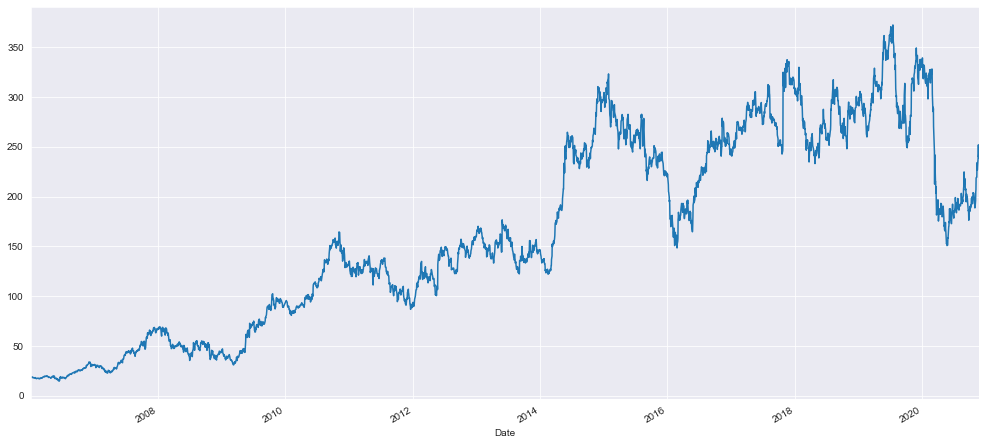

In [92]:
df["Adj Close"].plot(figsize=(17,8))

In [93]:
# A variable for predicting 'n' days out into the future 
forecast_out = 30

In [94]:
# Create another column (the target or dependent variable) shifted 'n' units up
df['Prediction'] = df[['Adj Close']].shift(-forecast_out)
df.head()

,Adj Close,Prediction
Date,,
2006-01-02,18.207844,17.469393
2006-01-03,18.351706,17.259117
2006-01-04,18.469419,17.396948
2006-01-05,18.940254,17.474422
2006-01-06,18.917118,17.449259


In [95]:
df.tail()

,Adj Close,Prediction
Date,,
2020-11-18,252.000000,NaN
2020-11-19,239.750000,NaN
2020-11-20,242.750000,NaN
2020-11-23,238.699997,NaN
2020-11-24,243.850006,NaN


### Create the indeoendent data set (X)

In [96]:
# Convert the data-frame to the numpy array
X = np.array(df.drop(['Prediction'], axis=1))

In [97]:
# Remove the last 'n' rows
X = X[:-forecast_out]

In [98]:
X

array([[ 18.20784378],
       [ 18.35170555],
       [ 18.46941948],
       ...,
       [191.5       ],
       [198.30000305],
       [198.69999695]])

### Create the dependent data set (y)

In [99]:
# Convert the dataframe to a numpy array (All of the values including the "NaN"s)
y = np.array(df["Prediction"])

In [100]:
# Get all of the y value except the last 'n' rows
y = y[:-forecast_out]

In [101]:
y

array([ 17.46939278,  17.25911713,  17.39694786, ..., 242.75      ,
       238.69999695, 243.8500061 ])

## Split the data

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Create Support Vector Machine (Regressor)

In [103]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

In [104]:
svr_rbf.fit(X_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Testing Model

In [105]:
# Score returns the coefficient of determination R^2 of the prediction.

In [106]:
svm_confidence = svr_rbf.score(X_test, y_test)
print("SVM Confidence: ",svm_confidence)

SVM Confidence:  0.9324294708840387


## Create and train the Linear Regression Model

In [107]:
lr = LinearRegression()

In [108]:
lr.fit(X_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
# Test the model

In [110]:
lr_confidence = lr.score(X_test, y_test)
print("LR Confidence: ",lr_confidence)

LR Confidence:  0.9333968482692382


In [111]:
# Set X_forecast equals to the last 30 rows of the original data set from the "Adj Close" column
X_forecast = np.array(df.drop(["Prediction"], axis=1))[-forecast_out:]

In [112]:
X_forecast

array([[195.69999695],
       [200.05000305],
       [192.8500061 ],
       [195.94999695],
       [204.        ],
       [203.05000305],
       [203.75      ],
       [203.30000305],
       [202.80000305],
       [196.69999695],
       [194.6499939 ],
       [190.44999695],
       [188.69999695],
       [189.25      ],
       [196.05000305],
       [204.75      ],
       [207.        ],
       [218.6499939 ],
       [219.19999695],
       [219.5       ],
       [231.69999695],
       [234.19999695],
       [226.80000305],
       [229.44999695],
       [240.19999695],
       [252.        ],
       [239.75      ],
       [242.75      ],
       [238.69999695],
       [243.8500061 ]])

## Prediction for the next "n" days

#### Linear Regression

In [113]:
lr_prediction = lr.predict(X_forecast)
lr_prediction

array([197.43514731, 201.64272337, 194.67847227, 197.67696169,
       205.46338758, 204.5444959 , 205.2215732 , 204.78631028,
       204.30268152, 198.40240482, 196.41952397, 192.35704539,
       190.66434475, 191.19633933, 197.77369334, 206.18883071,
       208.3651601 , 219.63370417, 220.16569875, 220.45587896,
       232.25641761, 234.67456138, 227.51686172, 230.08008821,
       240.47810642, 251.89174797, 240.0428435 , 242.94461602,
       239.02722016, 244.00860519])

#### SVM

In [114]:
svm_prediction = svr_rbf.predict(X_forecast)
svm_prediction

array([199.55457789, 190.3120528 , 188.3622216 , 202.56271424,
       167.1215857 , 189.65028228, 172.56323801, 183.69961669,
       194.8182083 , 209.1768085 , 187.34275273, 196.64413537,
       195.0997463 , 195.58121157, 203.68776842, 159.81958285,
       212.92067616, 246.96574831, 249.68654322, 250.27528801,
       231.6408414 , 241.92321717, 254.83081431, 246.26295808,
       251.33586854, 256.41261327, 250.2867049 , 249.35599811,
       243.37045729, 246.48826923])

In [120]:
df2 = pd.DataFrame(lr_prediction)